## Q1
จงเขียนฟังก์ชัน get_dict() ที่สร้าง dictionary ที่มีการเก็บข้อมูลรายวิชาต่อไปนี้ <br>


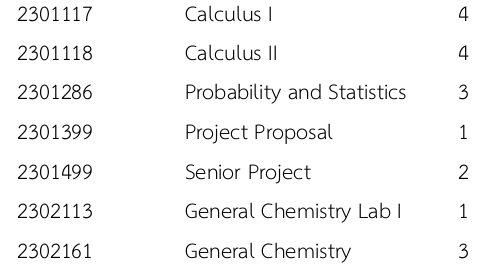



และเขียนฟังก์ชัน run() วนรับรหัสรายวิชาจากผู้ใช้ และหาชื่อรายวิชาและหน่วยกิตแสดงเป็นผลลัพธ์ (เลิกวนรับเมื่อรหัสเป็น 0) <br> 
กำหนดให้ มี key เป็นสตริงของรหัสวิชา และ มี value เป็นทูเปิ้ลของสตริงชื่อวิชาและสตริงหน่วยกิต 

### ตัวอย่างการทำงาน: 

Course ID: **2301117** <br>
Calculus I 4 <br>
Course ID: **0** <br>

### ตัวอย่างการทำงาน: 

Course ID: **2301117** <br>
Calculus I 4 <br>
Course ID: **2302161**  <br>
General Chemistry 3 <br>
Course ID: **0** <br>

### ตัวอย่างการทำงาน: 

Course ID: **2301117** <br>
Calculus I 4 <br>
Course ID: **2302161**  <br>
General Chemistry 3 <br>
Course ID: **2301118**  <br>
Calculus II 4 <br>
Course ID: **0** <br>

### ตัวอย่างการทำงาน: 

Course ID: **2301117** <br>
Calculus I 4 <br>
Course ID: **2302161**  <br>
General Chemistry 3 <br>
Course ID: **230161**  <br>
Unknown <br>
Course ID: **2301118**  <br>
Calculus II 4 <br>
Course ID: **0** <br>

### ตัวอย่างการทำงาน: 

Course ID: **2301117** <br>
Calculus I 4 <br>
Course ID: **2302161**  <br>
General Chemistry 3 <br>
Course ID: **230161**  <br>
Unknown <br>
Course ID: **2301118**  <br>
Calculus II 4 <br>
Course ID: **230172**  <br>
Unknown <br>
Course ID: 2301286 <br>
Probability and Statistics 3 <br>
Course ID: **0** <br>

In [22]:
def get_dict():
    ''' สร้าง dictionary จากตาราง'''
    return {
        "2301117": ('Calculus I','4'),
        "2301118": ('Calculus II' , '4'),
        "2301286": ("Probability and Statistics", 3),
        "2301399": ("Project Proposal",           1),
        "2301499": ("Senior Project",             2),
        "2302113": ("General Chemistry Lab I",    1),
        "2302161": ('General Chemistry','3')
    }
def run():
    subject = get_dict()
    ''' วนรับรหัสรายวิชาจากผู้ใช้ และหาชื่อรายวิชาและหน่วยกิตแสดงเป็นผลลัพธ์ (เลิกวนรับเมื่อรหัสเป็น 0)'''
    cid = input("id:")
    while cid != "0":
        print(*subject.get(cid, ("Unknown", "")), sep=" ")
        cid = input("id:")

In [ ]:
'''ตรวจสอบผลลัพธ์ของโปรแกรมด้วยการรันที่ cell นี้'''
# run()

In [23]:
'''ตรวจสอบผลการคำนวณ'''
from unittest.mock import patch
from io import StringIO

def test(inputs,expected_output,f): 
    with patch('builtins.input', side_effect=inputs), patch('sys.stdout', new_callable=StringIO) as mock_stdout:
        f()
        assert ''.join(mock_stdout.getvalue().lower().split()) == ''.join(expected_output.lower().split()),mock_stdout.getvalue()
def test_easy_print(inputs,expected_output):
    with patch('builtins.input', side_effect=inputs), patch('sys.stdout', new_callable=StringIO) as mock_stdout:
        run()
        assert expected_output in mock_stdout.getvalue(), mock_stdout.getvalue()

In [24]:
'''ตรวจสอบการแสดงผลลัพธ์อย่างง่าย'''
test_easy_print(inputs=['2301117','0'],expected_output='C')
print('ok')

ok


In [25]:
'''ตรวจสอบการสร้างdictionary'''
assert get_dict()['2301117'] == ('Calculus I','4')
assert get_dict()['2302161'] == ('General Chemistry','3')
assert get_dict()['2301118'] == ('Calculus II' , '4')
print('ok')

ok


In [26]:
'''ตรวจสอบผลการคำนวณและการแสดงผลลัพธ์ให้เหมือนกับโจทย์ที่กำหนดให้'''
'''Test #Course 1'''
test(['2301117','0'],'Calculus I 4\n',f=run)
test(['2302161','0'],'General Chemistry 3\n',f=run)
test(['2301499','0'],'Senior Project 2\n',f=run)
test(['2302113','0'],'General Chemistry Lab I 1\n',f=run)
print('ok')

ok


In [27]:
'''ตรวจสอบผลการคำนวณและการแสดงผลลัพธ์ให้เหมือนกับโจทย์ที่กำหนดให้'''
'''Test #Course 2'''
test(['2301117','2302161','0'],'Calculus I 4\nGeneral Chemistry 3\n',f=run)
test(['2301286','2301399','0'],'Probability and Statistics 3\nProject Proposal 1\n',f=run)
test(['2301117','2302113','0'],'Calculus I 4\nGeneral Chemistry Lab I 1\n',f=run)
test(['2302161','2301118','0'],'General Chemistry 3\nCalculus II 4\n',f=run)
test(['2301286','2301499','0'],'Probability and Statistics 3\nSenior Project 2\n',f=run)
print('ok')

ok


In [28]:
'''ตรวจสอบผลการคำนวณและการแสดงผลลัพธ์ให้เหมือนกับโจทย์ที่กำหนดให้'''
'''Test #Course 3+Unknown'''
test(['2301117','2302161','230161','2301118','0'],'Calculus I 4\nGeneral Chemistry 3\nUnknown\nCalculus II 4\n',f=run)
test(['2301118','2301286','2301398','2301399','0'],'Calculus II 4\nProbability and Statistics 3\nUnknown\nProject Proposal 1\n',f=run)
test(['2301117','23021','2301118','2302113','0'],'Calculus I 4\nUnknown\nCalculus II 4\nGeneral Chemistry Lab I 1\n',f=run)
test(['2161','2302161','2301118','2301286','0'],'Unknown\nGeneral Chemistry 3\nCalculus II 4\nProbability and Statistics 3\n',f=run)
print('ok')

ok


In [29]:
'เทสลับ1'

'เทสลับ1'

In [30]:
'เทสลับ2'

'เทสลับ2'

In [31]:
'เทสลับ3'

'เทสลับ3'